## Four Feature selection methods by DJ

In [3]:
import os
import pandas as pd
os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\#MSDS 6130 Capstone A & B\\MSDS6120 CapstoneA\\#ProjectData&NoteBook')

In [4]:
import pandas as pd

In [5]:
dfTrain = pd.read_csv(r'UNSW_NB15_training_set.csv')
dfTest = pd.read_csv(r'UNSW_NB15_testing_set.csv')
list_events = pd.read_csv(r'UNSW_NB15_LIST_EVENTS.csv')
features = pd.read_csv(r'UNSW_NB15_features.csv',encoding='latin1')

In [7]:
#dfTrain = pd.read_csv('G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/UNSW_NB15_training-set.csv')
#dfTest = pd.read_csv('G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/UNSW_NB15_testing-set.csv')
#list_events = pd.read_csv("G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/UNSW-NB15_LIST_EVENTS.csv")
#features = pd.read_csv("G:/SMU Data Science/SMU Courses/DS 6120 Capstone A/UNSW-NB15 Data Set/NUSW-NB15_features.csv",encoding='latin1')


In [6]:
obj_dfTrain = dfTrain.select_dtypes(include=['object']).copy()
obj_dfTrain.head()

,proto,service,state,attack_cat
0,tcp,-,FIN,Normal
1,tcp,-,FIN,Normal
2,tcp,-,FIN,Normal
3,tcp,ftp,FIN,Normal
4,tcp,-,FIN,Normal


In [7]:
List_Of_Categories_In_Column=list(dfTrain['attack_cat'].value_counts().index)
List_Of_Categories_In_Column

['Normal',
 'Generic',
 'Exploits',
 'Fuzzers',
 'DoS',
 'Reconnaissance',
 'Analysis',
 'Backdoor',
 'Shellcode',
 'Worms']

In [8]:
dfTrain.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [9]:
# label encoding the catagorical coloumn "proto"
dfTrain["proto"] = dfTrain["proto"].astype('category')
dfTrain["service"] = dfTrain["service"].astype('category')
dfTrain["state"] = dfTrain["state"].astype('category')
#obj_dfTrain["attack_cat"] = dfTrain["attack_cat"].astype('category')
dfTrain.dtypes

id                      int64
dur                   float64
proto                category
service              category
state                category
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                   int64
trans_depth             int64
response_body_len       int64
ct_srv_src              int64
ct_state_ttl            int64
ct_dst_ltm

In [10]:
dfTrain["protocol_type"] = dfTrain["proto"].cat.codes
dfTrain["service_type"] = dfTrain["service"].cat.codes
dfTrain["state_type"] = dfTrain["state"].cat.codes
dfTrain.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,protocol_type,service_type,state_type
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,0,0,1,1,0,Normal,0,113,0,2
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,0,0,1,6,0,Normal,0,113,0,2
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,0,0,2,6,0,Normal,0,113,0,2
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,0,2,1,0,Normal,0,113,3,2
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,0,0,2,39,0,Normal,0,113,0,2


In [11]:
dfTrain2 = dfTrain.drop(['id','attack_cat','proto','service', 'state'], axis = 1)


In [12]:
dfTrain2.head(5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,protocol_type,service_type,state_type
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,1,0,0,113,0,2
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,6,0,0,113,0,2
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,2,6,0,0,113,0,2
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,1,0,2,1,0,0,113,3,2
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,2,39,0,0,113,0,2


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [14]:
dfTrain2.columns[1:]

Index(['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
       'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
       'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'protocol_type',
       'service_type', 'state_type'],
      dtype='object')

In [15]:
#X= ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
#       'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
#       'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
#       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
#       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
#       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
#       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'protocol_type',
#       'service_type', 'state_type']
#y=['labels']

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
dfTrain2.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,protocol_type,service_type,state_type
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622,109.606675,1.618920,2.355176
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237,22.352601,2.305151,0.867942
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,113.000000,0.000000,2.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000,113.000000,0.000000,2.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000,119.000000,2.000000,3.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000,132.000000,12.000000,8.000000


In [18]:
#X = dfTrain2.iloc[:,0:43]

In [19]:
#y = dfTrain2.iloc[:,-4]

In [20]:
#X= ['spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
#       'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
#       'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
#       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
#       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
#       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
#       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'protocol_type',
#       'service_type', 'state_type']

In [21]:
#get correlations of each features in dataset
#import matplotlib.pyplot as plt
#corrmat = dfTrain2.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(dfTrain2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
## dfTrain3 = dfTrain2.drop(['label'], axis = 1)

# DJ Classification

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.s plt

## Random forest classifier for feature selection

In [24]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 300))

In [25]:
# old school indexing using iloc
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
X=dfTrain2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42]]

In [26]:
y = dfTrain2.iloc[:,-4]

In [27]:
X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'protocol_type',
       'service_type', 'state_type'],
      dtype='object')

In [28]:
X.shape

(175341, 42)

In [29]:
y.shape

(175341,)

In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [31]:
X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'protocol_type',
       'service_type', 'state_type'],
      dtype='object')

In [32]:
#y.columns

In [34]:
#Check missing values 
dfTrain2.isnull().values.any()

False

In [35]:
select.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [36]:
# Transform that to array 
select.transform(X)

array([[1.214780e-01, 2.580000e+02, 1.720000e+02, ..., 4.300000e+01,
        0.000000e+00, 1.000000e+00],
       [6.499020e-01, 7.340000e+02, 4.201400e+04, ..., 1.106000e+03,
        1.000000e+00, 6.000000e+00],
       [1.623129e+00, 3.640000e+02, 1.318600e+04, ..., 8.240000e+02,
        1.000000e+00, 6.000000e+00],
       ...,
       [9.000000e-06, 1.140000e+02, 0.000000e+00, ..., 0.000000e+00,
        2.000000e+00, 1.200000e+01],
       [9.000000e-06, 1.140000e+02, 0.000000e+00, ..., 0.000000e+00,
        2.000000e+00, 3.000000e+01],
       [9.000000e-06, 1.140000e+02, 0.000000e+00, ..., 0.000000e+00,
        2.000000e+00, 3.000000e+01]])

In [37]:
# true indicates good varriable , False indicates bad varriable
select.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False])

In [38]:
len(select.get_support())

42

In [39]:
# one to one matching of boolea value to respective coloumns 
X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'protocol_type',
       'service_type', 'state_type'],
      dtype='object')

In [40]:
list1 = list(select.get_support())

In [41]:
#list1

In [42]:
df_feat_imp = pd.DataFrame({"Feature_Name":X.columns, "Importance": list1})

In [43]:
#df_feat_imp

In [44]:
#df_feat_imp.sort_values(["Importance"],ascending = False)

In [45]:
df=df_feat_imp

In [47]:
DfModelSelection1=df.loc[df['Importance'] == True]
DfModelSelection1

,Feature_Name,Importance
0,dur,True
3,sbytes,True
4,dbytes,True
5,rate,True
6,sttl,True
7,dttl,True
8,sload,True
9,dload,True
12,sinpkt,True
13,dinpkt,True


In [48]:
DfModelSelection1.sort_values(["Feature_Name"],ascending = False)

,Feature_Name,Importance
20,tcprtt,True
21,synack,True
6,sttl,True
23,smean,True
8,sload,True
12,sinpkt,True
3,sbytes,True
5,rate,True
0,dur,True
7,dttl,True


## Second Method

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

C:\Users\Brook\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc.feature_importances_

array([1.49989410e-02, 3.67149825e-03, 4.99187143e-03, 2.87470032e-02,
       1.20887969e-02, 1.71846557e-02, 2.25556064e-01, 3.75982651e-02,
       4.93860070e-02, 1.39702479e-01, 4.85952468e-03, 2.97459651e-03,
       3.10014433e-02, 9.29125140e-03, 1.19216998e-02, 8.43231774e-03,
       2.09955187e-03, 7.20915567e-03, 6.98377411e-03, 1.09133039e-03,
       2.23782398e-02, 1.47485718e-02, 4.37570214e-02, 2.21292943e-02,
       1.33453531e-02, 1.72110591e-03, 1.95013463e-03, 1.72807342e-02,
       1.45181076e-01, 6.08917274e-03, 6.14740675e-03, 4.10856692e-03,
       2.93558037e-02, 1.05293511e-04, 1.42326432e-04, 1.51346345e-03,
       7.09892714e-03, 2.41356064e-02, 7.62225157e-03, 3.35666129e-03,
       3.90386539e-03, 4.13889589e-03])

In [51]:
X.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'protocol_type',
       'service_type', 'state_type'],
      dtype='object')

In [52]:
list2 = list(select.get_support())
#list2

In [53]:
df_feat_imp2 = pd.DataFrame({"Feature_Name":X.columns, "Importance": list(rfc.feature_importances_)})
df_feat_imp2.sort_values(["Importance"],ascending = False)

,Feature_Name,Importance
6,sttl,0.225556
28,ct_state_ttl,0.145181
9,dload,0.139702
8,sload,0.049386
22,ackdat,0.043757
7,dttl,0.037598
12,sinpkt,0.031001
32,ct_dst_src_ltm,0.029356
3,sbytes,0.028747
37,ct_srv_dst,0.024136


## Third Method of feature Selection

### Method Baruta using a wrapper on the random forest method with iterations

In [64]:
import numpy as np

In [106]:
X = np.array(X) # Converting the data into an array for Baruta
y = np.array(y)

In [107]:
X

array([[1.214780e-01, 6.000000e+00, 4.000000e+00, ..., 1.130000e+02,
        0.000000e+00, 2.000000e+00],
       [6.499020e-01, 1.400000e+01, 3.800000e+01, ..., 1.130000e+02,
        0.000000e+00, 2.000000e+00],
       [1.623129e+00, 8.000000e+00, 1.600000e+01, ..., 1.130000e+02,
        0.000000e+00, 2.000000e+00],
       ...,
       [9.000000e-06, 2.000000e+00, 0.000000e+00, ..., 1.190000e+02,
        2.000000e+00, 3.000000e+00],
       [9.000000e-06, 2.000000e+00, 0.000000e+00, ..., 1.190000e+02,
        2.000000e+00, 3.000000e+00],
       [9.000000e-06, 2.000000e+00, 0.000000e+00, ..., 1.190000e+02,
        2.000000e+00, 3.000000e+00]])

In [108]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
from boruta import BorutaPy

In [113]:
rf = RandomForestClassifier()

In [114]:
boruta_feature_selector = BorutaPy(rf, random_state = 111, max_iter = 50, perc = 100 , verbose =2)

In [115]:
boruta_feature_selector.fit(X , y)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	28
Tentative: 	9
Rejected: 	5
Iteration: 	9 / 50
Confirmed: 	28
Tentative: 	9
Rejected: 	5
Iteration: 	10 / 50
Confirmed: 	28
Tentative: 	9
Rejected: 	5
Iteration: 	11 / 50
Confirmed: 	28
Tentative: 	9
Rejected: 	5
Iteration: 	12 / 50
Confirmed: 	29
Tentative: 	8
Rejected: 	5
Iteration: 	13 / 50
Confirmed: 	29
Tentative: 	8
Rejected: 	5
Iteration: 	14 / 50
Confirmed: 	29
Tentative: 	8
Rejected: 	5
Iteration: 	15 / 50
Confirmed: 	29
Tentative: 	8
Rejected: 	5
Iteration: 	16 / 50
Confirmed: 	29
Tentative: 	8
Rejected: 	5
Iteration: 	17 / 

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False,
            random_state=RandomState(MT19937) at 0x1B80FB7B360, verbose=0,
            warm_start=False),
     max_iter=50, n_estimators=1000, perc=100,
     random_state=RandomState(MT19937) at 0x1B80FB7B360, two_step=True,
     verbose=2)

In [122]:
boruta_feature_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True])

In [123]:
len(boruta_feature_selector.support_)

42

In [135]:
##??
X = dfTrain2.iloc[:,0:43]


In [136]:
df_feat_imp3 = pd.DataFrame({"Feature_Name":X.columns, "Importance": list(boruta_feature_selector.support_)})

In [138]:
df_feat_imp3.sort_values(["Importance"],ascending = False)

,Feature_Name,Importance
0,dur,True
16,swin,True
40,service_type,True
39,protocol_type,True
38,is_sm_ips_ports,True
37,ct_srv_dst,True
36,ct_src_ltm,True
32,ct_dst_src_ltm,True
31,ct_dst_sport_ltm,True
30,ct_src_dport_ltm,True


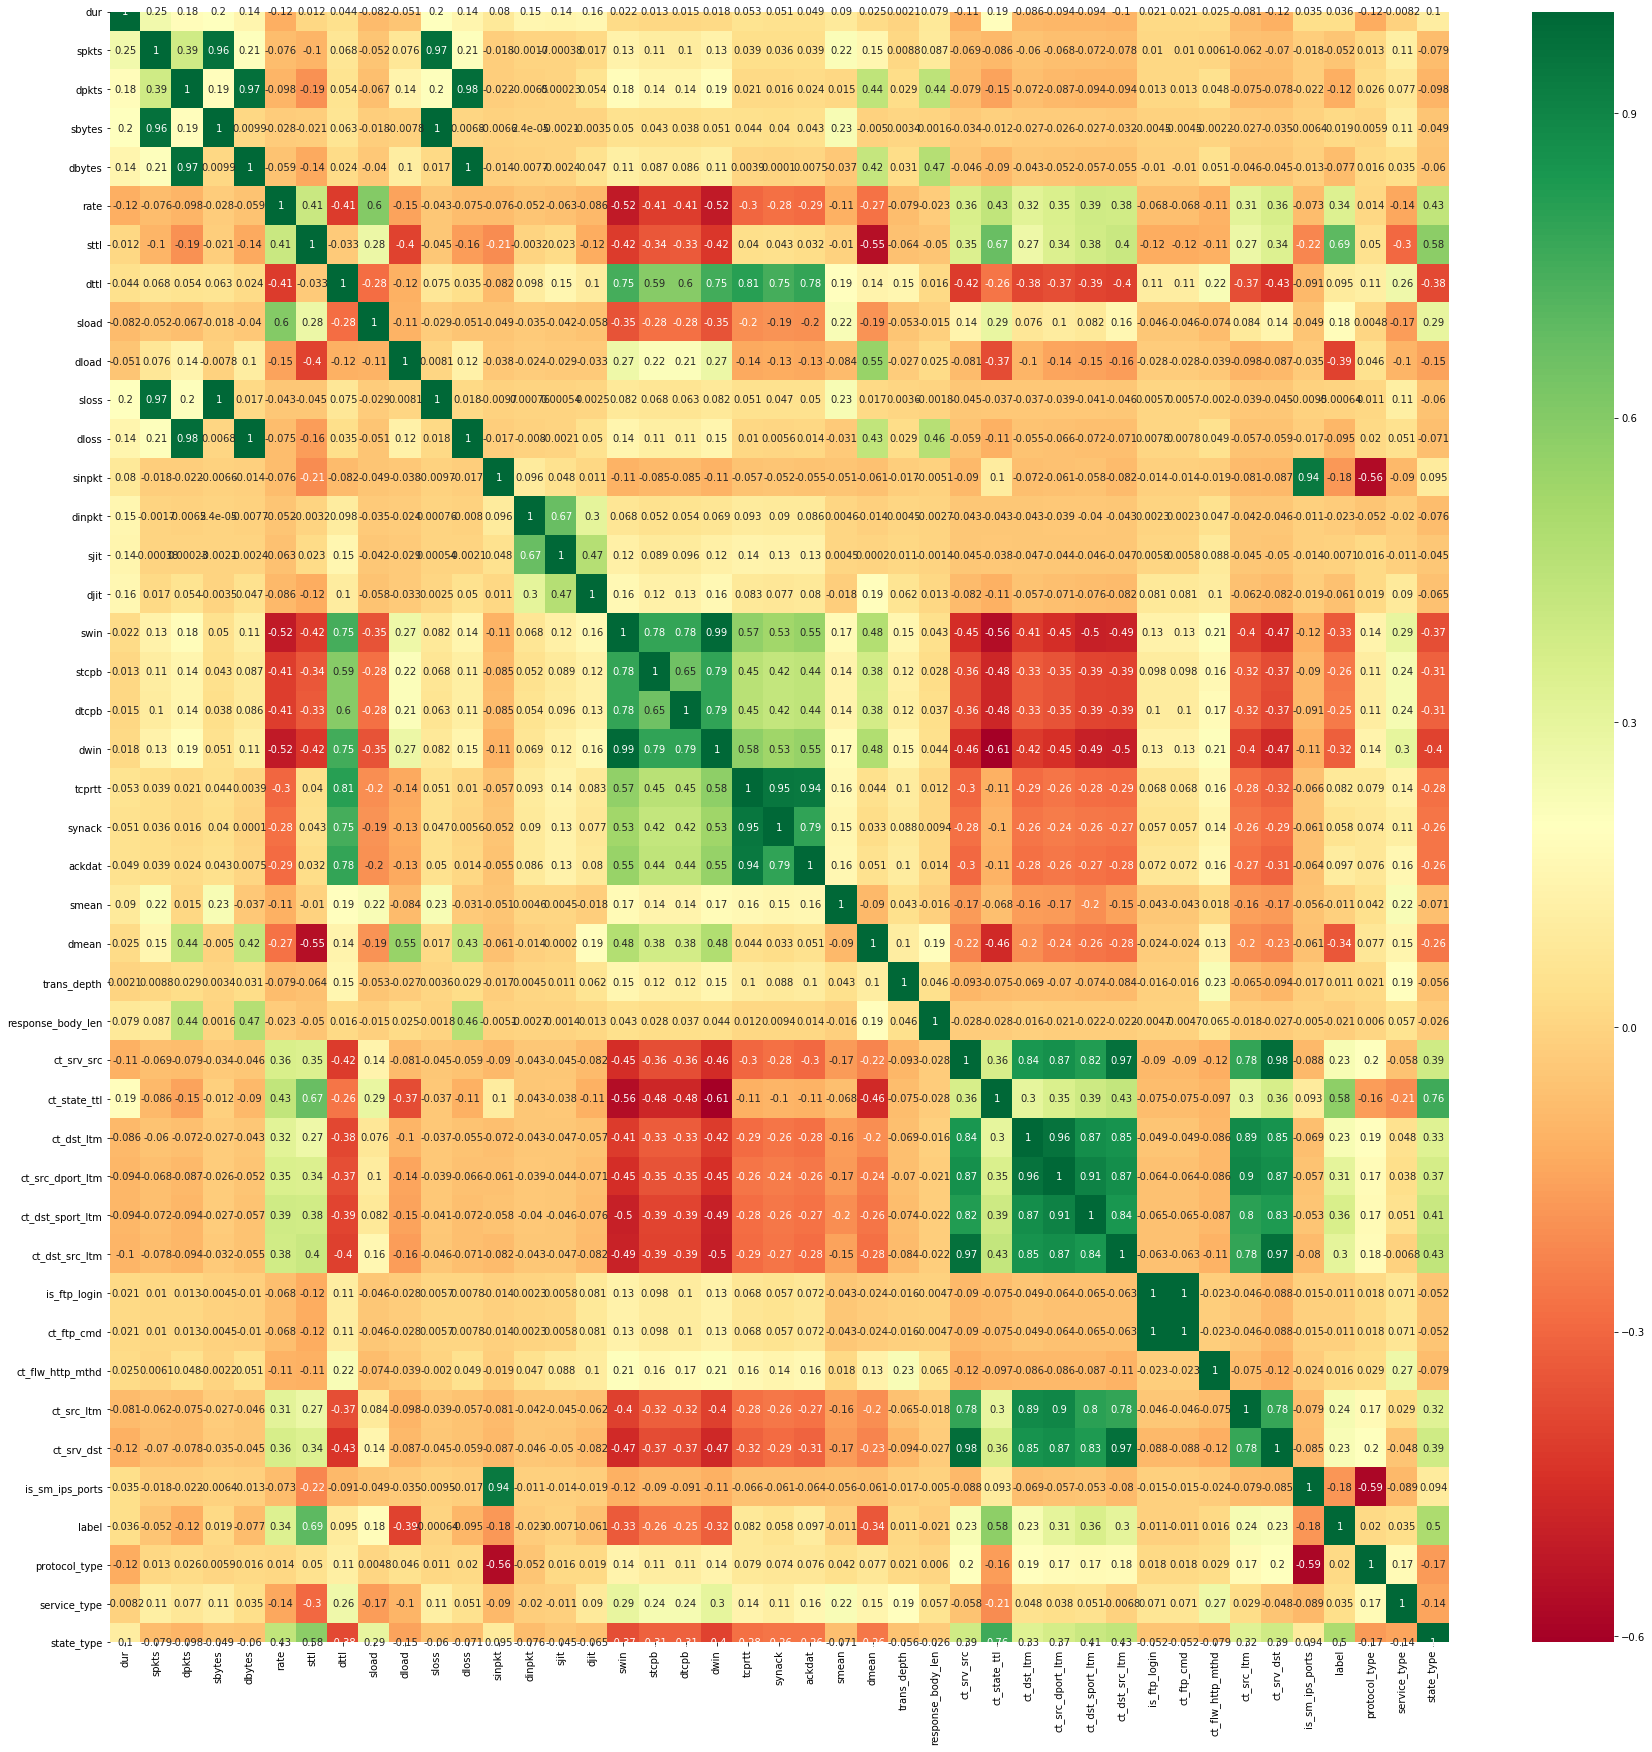

In [58]:
#get correlations of each features in dataset
import matplotlib.pyplot as plt
corrmat = dfTrain2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(dfTrain2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [54]:
import numpy as np

# Create correlation matrix
corr_matrix = dfTrain2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

['sbytes',
 'dbytes',
 'sloss',
 'dloss',
 'dwin',
 'synack',
 'ackdat',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [55]:
# Using Label encoding as a feature selection data enginnering  we come to conclusion from an output of random forest 
#selection method , boruta technique and covvariance matrix 

DfModelSelection1.sort_values(["Feature_Name"],ascending = False)

,Feature_Name,Importance
20,tcprtt,True
21,synack,True
6,sttl,True
23,smean,True
8,sload,True
12,sinpkt,True
3,sbytes,True
5,rate,True
0,dur,True
7,dttl,True


In [56]:
DataframeUsingLabelEncoding= DfModelSelection1.sort_values(["Feature_Name"],ascending = False)

In [57]:
DataframeUsingLabelEncoding

,Feature_Name,Importance
20,tcprtt,True
21,synack,True
6,sttl,True
23,smean,True
8,sload,True
12,sinpkt,True
3,sbytes,True
5,rate,True
0,dur,True
7,dttl,True


In [70]:
# reset index 
DataframeUsingLabelEncoding = DataframeUsingLabelEncoding.reset_index(drop=True)

In [75]:
DataframeUsingLabelEncoding

,Feature_Name,Importance
0,tcprtt,True
1,synack,True
2,sttl,True
3,smean,True
4,sload,True
5,sinpkt,True
6,sbytes,True
7,rate,True
8,dur,True
9,dttl,True


In [84]:
FinalDataFrame = DataframeUsingLabelEncoding.drop(DataframeUsingLabelEncoding.index[[1,6,13,15]])
FinalDataFrame

,Feature_Name,Importance
0,tcprtt,True
2,sttl,True
3,smean,True
4,sload,True
5,sinpkt,True
7,rate,True
8,dur,True
9,dttl,True
10,dmean,True
11,dload,True


#subjected to be removed because of high correlation from the covvariance matrix 
'sbytes',
'dbytes',
'synack',
'ct_srv_dst',
 

In [85]:
# reset index 
FinalDataFrame = FinalDataFrame.reset_index(drop=True)
FinalDataFrame

,Feature_Name,Importance
0,tcprtt,True
1,sttl,True
2,smean,True
3,sload,True
4,sinpkt,True
5,rate,True
6,dur,True
7,dttl,True
8,dmean,True
9,dload,True


In [86]:
#list(FinalDataFrameHotEncoding.columns.values)
dfTest=FinalDataFrame.loc[:,FinalDataFrame.columns.values =='Feature_Name' ]
dfTest

,Feature_Name
0,tcprtt
1,sttl
2,smean
3,sload
4,sinpkt
5,rate
6,dur
7,dttl
8,dmean
9,dload


In [87]:
# transpose to generate row values as coloumns or go to excel formula 

'tcprtt',
'sttl',
'smean',
'sload',
'sinpkt',
'rate',
'dur',
'dttl',
'dmean',
'dload',
'dinpkt',
'ct_state_ttl',


('ct_state_ttl',)

In [94]:
FinalDataFrame_LabelEncodings_Flow=dfTrain[[
'id' ,
'tcprtt',
'sttl',
'smean',
'sload',
'sinpkt',
'rate',
'dur',
'dttl',
'dmean',
'dload',
'dinpkt',
'ct_state_ttl',
'label']]

In [96]:
FinalDataFrame_LabelEncodings_Packet=dfTrain[[
'id' ,
'tcprtt',
'sttl',
'smean',
'sload',
'sinpkt',
'rate',
'dur',
'dttl',
'dmean',
'dload',
'dinpkt',
'ct_state_ttl',
'attack_cat']]

In [95]:
FinalDataFrame_LabelEncodings_Flow.head(5)

,id,tcprtt,sttl,smean,sload,sinpkt,rate,dur,dttl,dmean,dload,dinpkt,ct_state_ttl,label
0,1,0.000000,252,43,14158.942380,24.295600,74.087490,0.121478,254,43,8495.365234,8.375000,0,0
1,2,0.000000,62,52,8395.112305,49.915000,78.473372,0.649902,252,1106,503571.312500,15.432865,1,0
2,3,0.111897,62,46,1572.271851,231.875571,14.170161,1.623129,252,824,60929.230470,102.737203,1,0
3,4,0.000000,62,52,2740.178955,152.876547,13.677108,1.681642,252,64,3358.622070,90.235726,1,0
4,5,0.128381,254,53,8561.499023,47.750333,33.373826,0.449454,252,45,3987.059814,75.659602,1,0


In [97]:
FinalDataFrame_LabelEncodings_Packet.head(5)

,id,tcprtt,sttl,smean,sload,sinpkt,rate,dur,dttl,dmean,dload,dinpkt,ct_state_ttl,attack_cat
0,1,0.000000,252,43,14158.942380,24.295600,74.087490,0.121478,254,43,8495.365234,8.375000,0,Normal
1,2,0.000000,62,52,8395.112305,49.915000,78.473372,0.649902,252,1106,503571.312500,15.432865,1,Normal
2,3,0.111897,62,46,1572.271851,231.875571,14.170161,1.623129,252,824,60929.230470,102.737203,1,Normal
3,4,0.000000,62,52,2740.178955,152.876547,13.677108,1.681642,252,64,3358.622070,90.235726,1,Normal
4,5,0.128381,254,53,8561.499023,47.750333,33.373826,0.449454,252,45,3987.059814,75.659602,1,Normal


In [98]:
FinalDataFrame_LabelEncodings_Flow.shape

(175341, 14)

In [99]:
FinalDataFrame_LabelEncodings_Packet.shape

(175341, 14)

In [100]:

import os
import pandas as pd
os.chdir('C:\\Users\\Brook\\Desktop\\#SMU_Courses\\#MSDS 6130 Capstone A & B\\MSDS6120 CapstoneA\\#ProjectData&NoteBook')

In [101]:
# print current working directory 
print(os.getcwd())

C:\Users\Brook\Desktop\#SMU_Courses\#MSDS 6130 Capstone A & B\MSDS6120 CapstoneA\#ProjectData&NoteBook


In [102]:
# Export data to csv
FinalDataFrame_LabelEncodings_Flow.to_csv('FinalDataFrame_LabelEncodings_Flow.csv', encoding='utf-8')

In [103]:
# Export data to csv
FinalDataFrame_LabelEncodings_Packet.to_csv('FinalDataFrame_LabelEncodings_Packet.csv', encoding='utf-8')